# Image Classifier

## Data Preprocessing Steps 

#### Importing Necessary 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [2]:
my_dataframe = pd.read_csv('./Datasets/Training_Data/labels.csv')
training_data = []
class_labels = my_dataframe['category']
for i in range(my_dataframe.shape[0]):
    img = image.load_img('Datasets/Training_Data/'+my_dataframe['image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    training_data.append(img)
X = np.array(training_data)
Y = np.array(class_labels).reshape(-1,)
Y_encoded = to_categorical(Y, num_classes=5)
print(X)
print(Y)
print(Y_encoded)

[[[[0.6745098  0.6862745  0.7137255 ]
   [0.6745098  0.6862745  0.7137255 ]
   [0.6784314  0.6901961  0.7176471 ]
   ...
   [0.7411765  0.73333335 0.7372549 ]
   [0.7294118  0.72156864 0.7254902 ]
   [0.7294118  0.72156864 0.7254902 ]]

  [[0.6745098  0.6862745  0.7137255 ]
   [0.6745098  0.6862745  0.7137255 ]
   [0.6784314  0.6901961  0.7176471 ]
   ...
   [0.7411765  0.73333335 0.7372549 ]
   [0.7294118  0.72156864 0.7254902 ]
   [0.7294118  0.72156864 0.7254902 ]]

  [[0.6745098  0.6862745  0.7137255 ]
   [0.6745098  0.6862745  0.7137255 ]
   [0.6784314  0.6901961  0.7176471 ]
   ...
   [0.7411765  0.73333335 0.7372549 ]
   [0.73333335 0.7254902  0.7294118 ]
   [0.73333335 0.7254902  0.7294118 ]]

  ...

  [[0.15294118 0.2        0.24705882]
   [0.2        0.24705882 0.3019608 ]
   [0.1882353  0.23529412 0.2901961 ]
   ...
   [0.43137255 0.4627451  0.5058824 ]
   [0.29411766 0.31764707 0.37254903]
   [0.34901962 0.37254903 0.41960785]]

  [[0.24313726 0.2901961  0.3372549 ]
   [0.2

In [3]:
print(X.shape)
print(Y.shape)

(900, 224, 224, 3)
(900,)


### Testing to see if the data has been appropriately processed

Text(0.5, 0, 'Ship Class = 0')

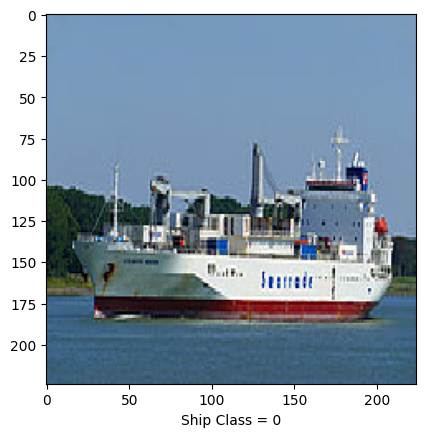

In [4]:
plt.imshow(X[2])
plt.xlabel('Ship Class = {}'.format(Y[2]))

## Defining the CNN and its corresponding layers.

#### Implementation - 3 - Training Accuracy - 99.7%, Validation accuracy - 75%

In [5]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

Metal device set to: Apple M1 Pro


2022-09-23 13:35:40.466463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-23 13:35:40.466630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### Using the Adam Optimizer to find a local minimum

In [6]:
# Add Optimizer
# optimizer = Adam(learning_rate=0.01) # best learning rate 
optimizer = Adam(learning_rate=0.001)
# model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
#               metrics=['accuracy'])

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
# Check model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 53, 53, 32)        0

## Model Training Process

#### Performing the train test split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2)
# Y_train = np.asarray(Y_train).reshape((-1,1))
# Y_test = np.asarray(Y_test).reshape((-1,1))
print(X_train.shape[0])
print(Y_train.shape[0])

720
720


#### Creating Model Image Generators 

In [8]:
# training_data_generator = ImageDataGenerator()
# testing_data_generator = ImageDataGenerator()
# training_data = training_data_generator.flow(X_train, Y_train, batch_size=64, subset='training')
# testing_data = testing_data_generator.flow(X_test, Y_test, batch_size=64, subset='validation')

#### Fitting Data into our CNN model

In [9]:
model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100


2022-09-23 13:35:40.771718: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-23 13:35:40.979330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 81ms/step - loss: 1.6308 - accuracy: 0.2264 - val_loss: 1.6009 - val_accuracy: 0.2167
Epoch 2/100


2022-09-23 13:35:42.884165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 72ms/step - loss: 1.6039 - accuracy: 0.2097 - val_loss: 1.5972 - val_accuracy: 0.2167
Epoch 3/100
23/23 [==============================] - 2s 71ms/step - loss: 1.5962 - accuracy: 0.2194 - val_loss: 1.5860 - val_accuracy: 0.2167
Epoch 4/100
23/23 [==============================] - 2s 71ms/step - loss: 1.5960 - accuracy: 0.2222 - val_loss: 1.5845 - val_accuracy: 0.2167
Epoch 5/100
23/23 [==============================] - 2s 71ms/step - loss: 1.5970 - accuracy: 0.2306 - val_loss: 1.5764 - val_accuracy: 0.2444
Epoch 6/100
23/23 [==============================] - 2s 72ms/step - loss: 1.5963 - accuracy: 0.2028 - val_loss: 1.5725 - val_accuracy: 0.2167
Epoch 7/100
23/23 [==============================] - 2s 71ms/step - loss: 1.5935 - accuracy: 0.2347 - val_loss: 1.5767 - val_accuracy: 0.2167
Epoch 8/100
23/23 [==============================] - 2s 71ms/step - loss: 1.5931 - accuracy: 0.2194 - val_loss: 1.5677 - val_accuracy: 0.2167
Epoch 9/100
23/23 

23/23 [==============================] - 2s 70ms/step - loss: 0.2033 - accuracy: 0.9403 - val_loss: 2.2057 - val_accuracy: 0.5500
Epoch 60/100
23/23 [==============================] - 2s 70ms/step - loss: 0.1820 - accuracy: 0.9389 - val_loss: 2.0847 - val_accuracy: 0.5944
Epoch 61/100
23/23 [==============================] - 2s 72ms/step - loss: 0.1610 - accuracy: 0.9500 - val_loss: 2.8573 - val_accuracy: 0.4944
Epoch 62/100
23/23 [==============================] - 2s 73ms/step - loss: 0.1406 - accuracy: 0.9542 - val_loss: 2.3858 - val_accuracy: 0.5611
Epoch 63/100
23/23 [==============================] - 2s 71ms/step - loss: 0.0863 - accuracy: 0.9736 - val_loss: 2.1687 - val_accuracy: 0.6278
Epoch 64/100
23/23 [==============================] - 2s 71ms/step - loss: 0.0967 - accuracy: 0.9681 - val_loss: 1.9490 - val_accuracy: 0.6611
Epoch 65/100
23/23 [==============================] - 2s 71ms/step - loss: 0.1403 - accuracy: 0.9528 - val_loss: 2.1827 - val_accuracy: 0.6278
Epoch 66/100

## Assumptions and Interpretations made

## Model Training Results and Performance Metrics 